# Модуль 17. Практическая работа

## Цели работы

1. Познакомиться с фреймворком PyTorch, закрепить навыки из видео.
1. Обучить простую полносвязную нейронную сеть, которая решает задачу регрессии.

## Что нужно сделать

1. Загрузите датасет `california_housing` из пакета `sklearn.datasets`.
1. Разделите датасет на тренировочную и тестовую выборки. 
1. Реализуйте абстракцию доступа к тренировочным данным на основе `torch.utils.data.Dataset` и `torch.utils.data.DataLoader`. 
1. Соберите нейронную сеть из слоёв пакета torch.nn.
1. Создайте экзепляры классов для функции потерь (`torch.nn.MSELoss`) и оптимизатора (`torch.optim.Adam`).
1. Реализуйте тренировочный цикл.
1. Вычислите значение функции потерь на тестовой выборке после каждой каждой эпохи и сохраните его в Python-список.
1. После завершения тренировочного цикла нарисуйте график зависимости функции потерь на тестовой выборке от количества эпох обучения.

## Что оценивается

Это задание с самопроверкой, сдавать его не нужно. Просто сверьтесь с решением в конце ноутбука.

## Информация о задаче

### Описание датасета 

Набор данных, описывающий среднюю стоимость дома в округах Калифорнии. Целевая переменная — медианная стоимость дома в 100 000 долларов США в 1990 году, независимые переменные – характеристики дома:

1. MedInc: медианный доход жильцов домов в квартале.
1. HouseAge: средний возраст дома в квартале.
1. AveRooms: среднее количество комнат.
1. AveBedrms: среднее количество спален. 
1. Population: число жильцов в квартале.
1. AveOccup: среднее число жильцов в квартире.
1. Latitude: широта центра квартала.
1. Longitude: долгота центра квартала.

Данные в датасете имеют разный масштаб. Например, обычно количество комнат в доме невелико, а население в расчёте на группу домов (квартал) — велико. Более того, большинство признаков должны быть положительными, а долгота — отрицательной (потому что речь идёт о Калифорнии). 

### Порядок выполнения задания

1. Ниже приведены семь ячеек с кодом, в котором есть недостающие фрагменты. 
1. Такие фрагменты выделены комментарием `# ВАШ КОД ЗДЕСЬ`. Ориентируйтесь на комментарии в коде. Они поясняют задания, где это необходимо. 
1. Заполните недостаюшие фрагменты так, чтобы семь ячеек, запущенные по порядку, приводили к обучению нейронной сети, которая решает задачу регрессии и предсказывает стоимость дома в Калифорнии по восьми характеристикам. Качество обучения контролируйте с помощью графика функции потерь на тестовой выборке, которая рассчитывается в конце каждой тренировочной эпохи. Если всё сделаете правильно, получится убывающий тренд: ошибка должна падать с ростом числа эпох. 

Опционально:

1. Экспериментируйте. Меняйте гиперпараметры модели: архитектуру сети, размер батча, число эпох и learning rate. Если интересно, можете поменять оптимизатор. По-умолчанию исплользуем [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (вариация градиентного спуска, которая адаптивно подстраивает learning rate) – в этой задаче этот численный алгоритм хорошо работает и быстро сходится. Замените его на классический стохастический градиентный спуск [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html), сходимость почти наверняка упадёт. Меняйте всё что хотите, наблюдайте, как это сказывается на качестве обучения. Так нарабатывается профессиональная интуиция и опыт.  
1. Подумайте, как улучшить модель. Например, в описании датасета неспроста указано, что данные в нём разного масштаба. Попробуйте привести их к одному масштабу, проверьте сходимость обучения. Это должно сработать.   




In [25]:
# ЯЧЕЙКА 1

import numpy as np

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [42]:
# ЯЧЕЙКА 2

d = fetch_california_housing()
X, y = d.data, d.target

# Разделение данных на тренировочную и тестовую выборки. Используйте соотношение 80/20
#
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=137, shuffle=True
)

In [43]:
# ЯЧЕЙКА 3 

class MyDataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.from_numpy(X.astype(np.float32))
    self.y = torch.from_numpy(y.astype(np.float32))

  def __getitem__(self, index):
    return self.X[index], self.y[index]

  def __len__(self):
      return self.X.shape[0]


  #
  # Определите конструктор и методы __getitem__ и __len__
  # Сделайте всё в точности так, как мы делали в видео
  #
  # ВАШ КОД ЗДЕСЬ
  #

# Инициализируем тренировочный torch.dataset
train_dataset = MyDataset(X_train, y_train)

# Преобразуем тестовую выборку в torch-тензоры всю целиком
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [44]:
# ЯЧЕЙКА 4

# Пусть размер батча у нас равен 16
batch_size = 128

# Создайте Dataloader для тренировочной выборки на основе экземпляра train_dataset
# Делайте как в видео, размер батча – batch_size
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [45]:
for i, (X_batch, y_batch) in enumerate(train_dataloader):
    print(f"batch #{i}: X_shape = {X_batch.shape}, y_shape = {y_batch.shape}")

batch #0: X_shape = torch.Size([128, 8]), y_shape = torch.Size([128])
batch #1: X_shape = torch.Size([128, 8]), y_shape = torch.Size([128])
batch #2: X_shape = torch.Size([128, 8]), y_shape = torch.Size([128])
batch #3: X_shape = torch.Size([128, 8]), y_shape = torch.Size([128])
batch #4: X_shape = torch.Size([128, 8]), y_shape = torch.Size([128])
batch #5: X_shape = torch.Size([128, 8]), y_shape = torch.Size([128])
batch #6: X_shape = torch.Size([128, 8]), y_shape = torch.Size([128])
batch #7: X_shape = torch.Size([128, 8]), y_shape = torch.Size([128])
batch #8: X_shape = torch.Size([128, 8]), y_shape = torch.Size([128])
batch #9: X_shape = torch.Size([128, 8]), y_shape = torch.Size([128])
batch #10: X_shape = torch.Size([128, 8]), y_shape = torch.Size([128])
batch #11: X_shape = torch.Size([128, 8]), y_shape = torch.Size([128])
batch #12: X_shape = torch.Size([128, 8]), y_shape = torch.Size([128])
batch #13: X_shape = torch.Size([128, 8]), y_shape = torch.Size([128])
batch #14: X_sha

In [46]:
# ЯЧЕЙКА 5


# Создайте нейронную сеть, которая состоит
# из одного входного, трёх скрытых и одного выходного слоя
# Архитектура сети такая:
#
# RegressionNet(
#   (hidden1): Linear(in_features=8, out_features=24, bias=True)
#   (f1): ReLU()
#   (hidden2): Linear(in_features=24, out_features=12, bias=True)
#   (f2): ReLU()
#   (hidden3): Linear(in_features=12, out_features=6, bias=True)
#   (f3): ReLU()
#   (output): Linear(in_features=6, out_features=1, bias=True)
# )
#
# Другими словами, во входном слое восемь нейронов (по числу независимых переменных
# в датасете), в первом скрытом – 24 нейрона, во втором скрытом – 12, в третьем
# скрытом – шесть, и в выходном слое – всего один нейрон. Функции активации всюду – ReLU.
# У входного слоя функции активации нет, у единственного нейрона выходного слоя – тоже
# нет
#
# Определите для функции сети метод forward, который последовательно применяет
# к входным данным слои сети и функции активации
#
class RegressionNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.hidden_1 = nn.Linear(8, 24)
        self.f1 = nn.ReLU()
        self.hidden_2 = nn.Linear(24, 12)
        self.f2 = nn.ReLU()
        self.hidden_3 = nn.Linear(12, 6)
        self.f3 = nn.ReLU()
        self.output = nn.Linear(6, 1)

    def forward(self, x):
        x = self.f1(self.hidden_1(x))
        x = self.f2(self.hidden_2(x))
        x = self.f3(self.hidden_3(x))
        return self.output(x)


# Объявляем экземпляр класса нейронной сети
model = RegressionNet()

# Должен напечатать следующее:
#
# RegressionNet(
#   (hidden1): Linear(in_features=8, out_features=24, bias=True)
#   (f1): ReLU()
#   (hidden2): Linear(in_features=24, out_features=12, bias=True)
#   (f2): ReLU()
#   (hidden3): Linear(in_features=12, out_features=6, bias=True)
#   (f3): ReLU()
#   (output): Linear(in_features=6, out_features=1, bias=True)
# )
#
print(model)

RegressionNet(
  (hidden_1): Linear(in_features=8, out_features=24, bias=True)
  (f1): ReLU()
  (hidden_2): Linear(in_features=24, out_features=12, bias=True)
  (f2): ReLU()
  (hidden_3): Linear(in_features=12, out_features=6, bias=True)
  (f3): ReLU()
  (output): Linear(in_features=6, out_features=1, bias=True)
)


In [47]:
# ЯЧЕЙКА 6

# Создайте объект класса, который реализует среднеквадратичную ошибку (MSE).
loss_fn = nn.MSELoss()

# Создаём оптимизатор. Тут будем использовать вариацию стохастического 
# градиентного спуска Adam. Это адаптивный алгоритм, который выбирает
# шаг изменения весов (learning rate) в зависимости от текущей ситуации. 
# Это очень эффективный алгоритм, который в большинстве случаев работает 
# лучше, чем обычный градиентный спуск с постоянным шагом. В этой задаче – 
# точно лучше. Если хотите убедиться, замените Adam на torch.optim.SDG
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Делаем 100 эпох
num_epochs = 100

# Сюда будем сохранять значение функции потерь на тестовой выборке
# после каждой эпохи обучения
loss_test = []

# Реализуйте тренировочный цикл
for i in range(num_epochs):
  for X, y in train_dataloader:
    pred = model(X)
    loss = loss_fn(pred, y.unsqueeze(-1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  # loss = loss_fn(pred, y.unsqueeze(-1))
  # loss_test.append(loss.item())
    
    
   # Реализуйте все шаги тренировочного цикла PyTorch
   #
   # ВАШ КОД ЗДЕСЬ
   #
  

  with torch.no_grad():
    # Конец эпохи: считаем функцию потерь на тестовой выборке, 
    # сохраняем в список, чтобы потом нарисовать график
    loss = loss_fn(
        model(X_test_tensor),
        y_test_tensor.unsqueeze(-1)
    ).item()
    loss_test.append(loss)
    print(f'epoch {i} loss {loss}')

epoch 0 loss 4.076721668243408
epoch 1 loss 3.443096876144409
epoch 2 loss 2.8880550861358643
epoch 3 loss 2.3525302410125732
epoch 4 loss 1.6971925497055054
epoch 5 loss 1.453649640083313
epoch 6 loss 1.2814061641693115
epoch 7 loss 1.2518982887268066
epoch 8 loss 1.239556908607483
epoch 9 loss 1.2307549715042114
epoch 10 loss 1.2260761260986328
epoch 11 loss 1.2280648946762085
epoch 12 loss 1.2174986600875854
epoch 13 loss 1.2118090391159058
epoch 14 loss 1.2063654661178589
epoch 15 loss 1.2038918733596802
epoch 16 loss 1.1949809789657593
epoch 17 loss 1.191603422164917
epoch 18 loss 1.1871705055236816
epoch 19 loss 1.1884222030639648
epoch 20 loss 1.1808830499649048
epoch 21 loss 1.168145775794983
epoch 22 loss 1.1591392755508423
epoch 23 loss 1.1651270389556885
epoch 24 loss 1.1440894603729248
epoch 25 loss 1.1586445569992065
epoch 26 loss 1.1284291744232178
epoch 27 loss 1.1212351322174072
epoch 28 loss 1.1232061386108398
epoch 29 loss 1.1042146682739258
epoch 30 loss 1.1014857292

In [48]:
len(loss_test)

100

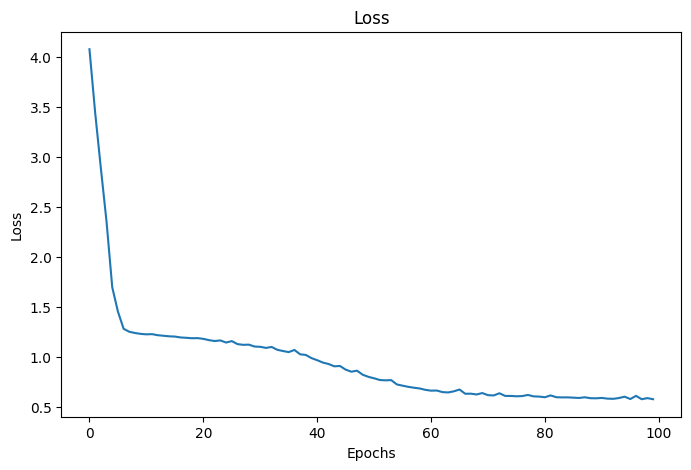

In [49]:
# ЯЧЕЙКА 7

step = np.arange(0, num_epochs)

fig, ax = plt.subplots(figsize=(8,5))

# Рисуем зависимость ошибки от эпохи обучения
plt.plot(step, np.array(loss_test))

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Решение для самоконтроля 

In [34]:
# ЯЧЕЙКА 1 

import numpy as np

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [35]:
# ЯЧЕЙКА 2 

d = fetch_california_housing()
X, y = d.data, d.target

# Разделение данных на тренировочную и тестовую выборки. Используйте соотношение 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,                                                 
    train_size=0.8, 
    shuffle=True
)

In [36]:
# ЯЧЕЙКА 3 

class MyDataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.from_numpy(X.astype(np.float32))
    self.y = torch.from_numpy(y.astype(np.float32))

  def __getitem__(self, index):
    return self.X[index], self.y[index]

  def __len__(self):
      return self.X.shape[0]

# Инициализируем тренировочный torch.dataset
train_dataset = MyDataset(X_train, y_train)

# Преобразуем всю тестовую выборку в torch-тензоры
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [37]:
# ЯЧЕЙКА 4

# Пусть размер батча у нас — 16
batch_size = 128

# Создайте Dataloader для тренировочной выборки на основе экземпляра train_dataset
# Делайте как в видео, размер батча – batch_size
train_dataloader = DataLoader(
    train_dataset, 
    batch_size=batch_size,
    # Миксуем семплы в случайном порядке 
    shuffle=True
)

In [38]:
# ЯЧЕЙКА 5

class RegressionNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(8, 24)
    self.f1 = nn.ReLU()
    self.hidden2 = nn.Linear(24, 12)
    self.f2 = nn.ReLU()
    self.hidden3 = nn.Linear(12, 6)
    self.f3 = nn.ReLU()
    self.output = nn.Linear(6, 1)

  def forward(self, x):
    x = self.f1(self.hidden1(x))
    x = self.f2(self.hidden2(x))
    x = self.f3(self.hidden3(x))
    return self.output(x)

# Объявляем экземпляр класса нейронной сети
model = RegressionNet()

print(model)

RegressionNet(
  (hidden1): Linear(in_features=8, out_features=24, bias=True)
  (f1): ReLU()
  (hidden2): Linear(in_features=24, out_features=12, bias=True)
  (f2): ReLU()
  (hidden3): Linear(in_features=12, out_features=6, bias=True)
  (f3): ReLU()
  (output): Linear(in_features=6, out_features=1, bias=True)
)


In [39]:
# ЯЧЕЙКА 6

loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 100

loss_train = []
loss_test = []

for i in range(num_epochs):
  for X, y in train_dataloader:
    
    pred = model(X)   

    loss = loss_fn(pred, y.unsqueeze(-1))

    optimizer.zero_grad()
         
    loss.backward()
            
    optimizer.step()
  
  with torch.no_grad():
    loss = loss_fn(
        model(X_test_tensor),
        y_test_tensor.unsqueeze(-1)
    ).item()
    loss_test.append(loss)
    print(f'epoch {i} loss {loss}')

epoch 0 loss 627.3060913085938
epoch 1 loss 20.14823341369629
epoch 2 loss 14.335555076599121
epoch 3 loss 10.820895195007324
epoch 4 loss 7.790374279022217
epoch 5 loss 2.167421817779541
epoch 6 loss 1.5991159677505493
epoch 7 loss 1.4036778211593628
epoch 8 loss 1.1650307178497314
epoch 9 loss 1.1068474054336548
epoch 10 loss 1.0449978113174438
epoch 11 loss 1.0158705711364746
epoch 12 loss 0.9868168830871582
epoch 13 loss 0.9636499881744385
epoch 14 loss 0.9428796768188477
epoch 15 loss 0.9222440123558044
epoch 16 loss 0.9089996218681335
epoch 17 loss 0.8884749412536621
epoch 18 loss 0.8687282204627991
epoch 19 loss 0.8494421243667603
epoch 20 loss 0.8527008295059204
epoch 21 loss 0.8317763209342957
epoch 22 loss 0.8194606900215149
epoch 23 loss 0.8105608224868774
epoch 24 loss 0.7894739508628845
epoch 25 loss 0.7798939943313599
epoch 26 loss 0.7548583745956421
epoch 27 loss 0.7372018694877625
epoch 28 loss 0.7365450859069824
epoch 29 loss 0.729972243309021
epoch 30 loss 0.714616537

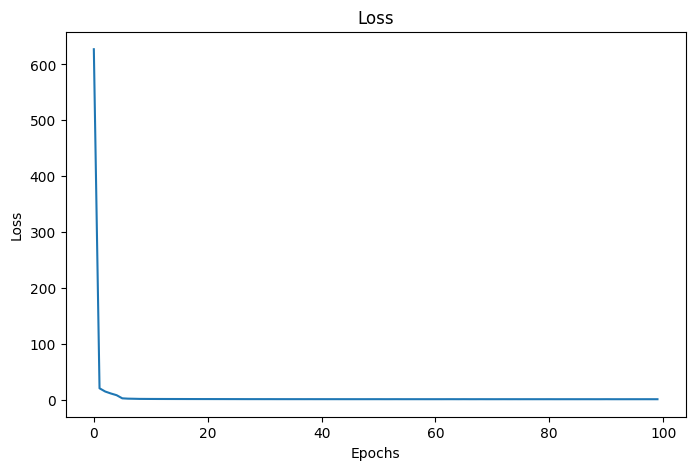

In [40]:
# ЯЧЕЙКА 7

step = np.arange(0, num_epochs)

fig, ax = plt.subplots(figsize=(8,5))

# Рисуем зависимость ошибки от эпохи обучения
plt.plot(step, np.array(loss_test))

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()